<a href="https://colab.research.google.com/github/Euzoka95/PDA2024/blob/main/IT7103_Lab_2_EUzoka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
# Install necessary libraries
!pip install pandas scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset using the uploaded file
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

In [5]:
# Check column types
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Split the data into 75% training and 25% testing
train_data, test_data = train_test_split(titanic_data, test_size=0.25, random_state=42)


In [16]:
# Split the data into 75% training and 25% testing
train_data, test_data = train_test_split(titanic_data, test_size=0.25, random_state=42)

# Print the shape of the original, training, and testing datasets
print("Original dataset shape:", titanic_data.shape)
print("Training dataset shape:", train_data.shape)
print("Testing dataset shape:", test_data.shape)

# Print the first few rows of each dataset to verify
print("\nTraining dataset example:")
print(train_data.head())

print("\nTesting dataset example:")
print(test_data.head())


Original dataset shape: (891, 12)
Training dataset shape: (668, 12)
Testing dataset shape: (223, 12)

Training dataset example:
     PassengerId  Survived  Pclass                             Name     Sex  \
298          299         1       1            Saalfeld, Mr. Adolphe    male   
884          885         0       3           Sutehall, Mr. Henry Jr    male   
247          248         1       2  Hamalainen, Mrs. William (Anna)  female   
478          479         0       3        Karlsson, Mr. Nils August    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   

       Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  
298    NaN      0      0            19988   30.5000     C106        S  
884  25.00      0      0  SOTON/OQ 392076    7.0500      NaN        S  
247  24.00      0      2           250649   14.5000      NaN        S  
478  22.00      0      0           350060    7.5208      NaN        S  
305   0.92      1      2           11

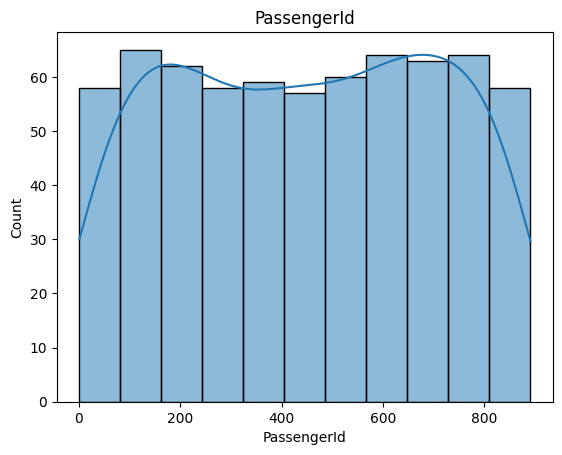

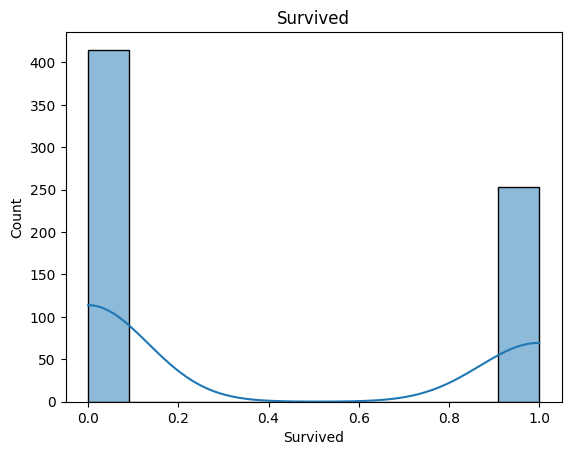

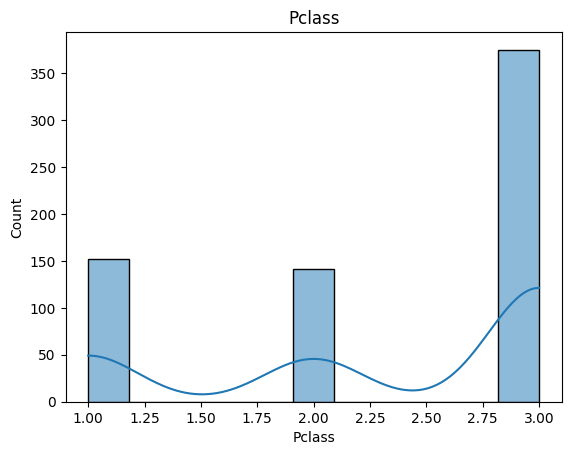

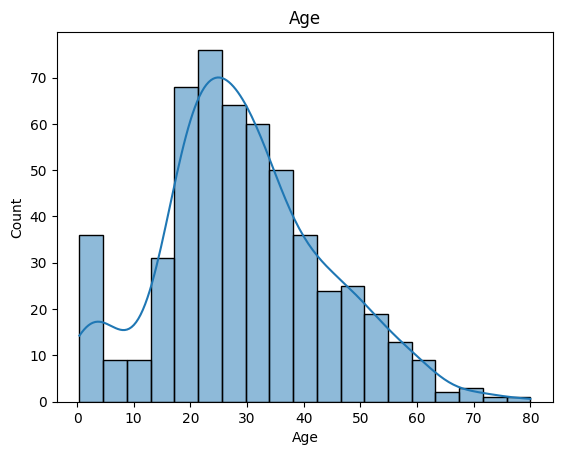

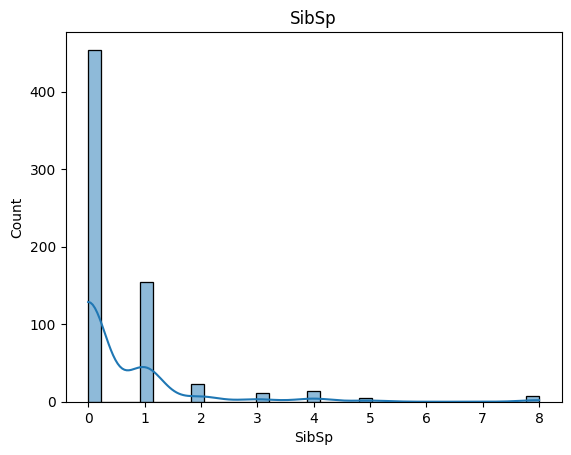

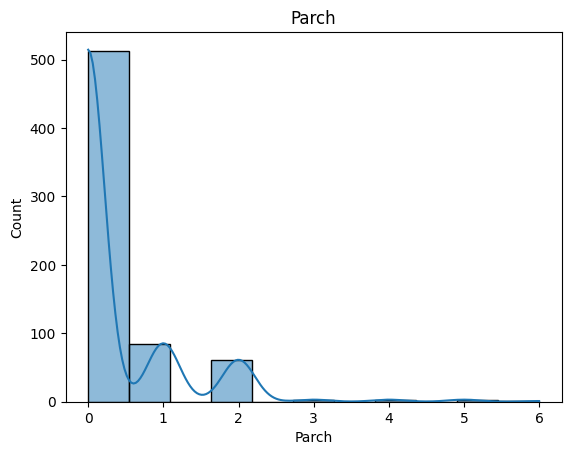

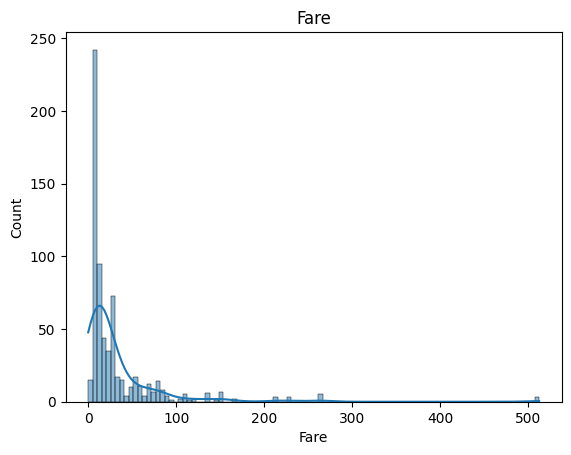

Numeric and symmetric columns: ['PassengerId', 'Survived', 'Pclass', 'Age']
Numeric and skewed columns: ['SibSp', 'Parch', 'Fare']
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numeric columns
numeric_columns = titanic_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = titanic_data.select_dtypes(include=['object']).columns

# Symmetric and skewed columns lists
symmetric_cols = []
skewed_cols = []

for col in numeric_columns:
    sns.histplot(train_data[col], kde=True)
    plt.title(col)
    plt.show()
    skewness = train_data[col].skew()
    if skewness < -1 or skewness > 1:
        skewed_cols.append(col)
    else:
        symmetric_cols.append(col)

# Display lists
print("Numeric and symmetric columns:", symmetric_cols)
print("Numeric and skewed columns:", skewed_cols)
print("Categorical columns:", categorical_columns)


In [13]:
from sklearn.compose import ColumnTransformer

# Define the pipelines for each type of column
numeric_symmetric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(func=np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_symmetric_pipeline, symmetric_cols),
        ('num_skew', numeric_skewed_pipeline, skewed_cols),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)


In [15]:
# Train the pipeline on the training data
preprocessor.fit(train_data)

# Transform the training and testing data
train_data_processed = preprocessor.transform(train_data)
test_data_processed = preprocessor.transform(test_data)

# Print the shape of the processed data
print("Shape of processed training data:", train_data_processed.shape)
print("Shape of processed testing data:", test_data_processed.shape)



Shape of processed training data: (668, 1322)
Shape of processed testing data: (223, 1322)
